# Programming Assignment: Build a CNN for image recognition.

### Name: Jarrin Sacayanan


## 0. You will do the following:

1. Read, complete, and run the code.

2. **Make substantial improvements** to maximize the accuracy.
    
3. Convert the .IPYNB file to .HTML file.

    * The HTML file must contain the code and the output after execution.
    
    * Missing **the output after execution** will not be graded.


4. Upload the .HTML file to your Google Drive, Dropbox, or Github repo. (If you submit the file to Google Drive or Dropbox, you must make the file "open-access". The delay caused by "deny of access" may result in late penalty.)

4. On Canvas, submit the Google Drive/Dropbox/Github link to the HTML file.


## Requirements:

1. You can use whatever CNN architecture, including VGG, Inception, and ResNet. However, you must build the networks layer by layer. You must NOT import the archetectures from ```keras.applications```.

2. Make sure ```BatchNormalization``` is between a ```Conv```/```Dense``` layer and an ```activation``` layer.

3. If you want to regularize a ```Conv```/```Dense``` layer, you should place a ```Dropout``` layer **before** the ```Conv```/```Dense``` layer.

4. An accuracy above 70% is considered reasonable. An accuracy above 80% is considered good. Without data augmentation, achieving 80% accuracy is difficult.


## Google Colab

- If you do not have GPU, the training of a CNN can be slow. Google Colab is a good option.

- Keep in mind that you must download it as an IPYNB file and then use IPython Notebook to convert it to HTML.

- Also keep in mind that the IPYNB and HTML files must contain the outputs. (Otherwise, the instructor will not be able to know the correctness and performance.) Do the followings to keep the outputs.

- In Colab, go to ```Runtime``` --> ```Change runtime type``` --> Do NOT check ```Omit code cell output when saving this notebook```. In this way, the downloaded IPYNB file contains the outputs.

In [ ]:
# [OPTIONAL] Install packages
%pip install keras tensorflow

In [40]:
# [OPTIONAL] Silence warnings
import warnings
warnings.filterwarnings('ignore');

## 1. Data preparation

### 1.1. Load data


In [30]:
from keras.datasets import cifar10
import numpy

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(numpy.max(y_train) - numpy.min(y_train) + 1))

shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


### 1.2. One-hot encode the labels

In the input, a label is a scalar in $\{0, 1, \cdots , 9\}$. One-hot encode transform such a scalar to a $10$-dim vector. E.g., a scalar ```y_train[j]=3``` is transformed to the vector ```y_train_vec[j]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.

1. Define a function ```to_one_hot``` that transforms an $n\times 1$ array to a $n\times 10$ matrix.

2. Apply the function to ```y_train``` and ```y_test```.

In [31]:
def to_one_hot(y, num_class=10):
    ### START Student Code

    # Create an empty matrix
    y_hot = numpy.zeros((y.size, num_class))
    
    # Assign 1 to values in y
    for ind, y_i in enumerate(y):
        y_hot[ind][y_i] = 1
    
    return y_hot
    ### END Student Code

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#### Remark: the outputs should be
* Shape of y_train_vec: (50000, 10)
* Shape of y_test_vec: (10000, 10)
* [6]
* [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

### 1.3. Randomly partition the training set to training and validation sets

Randomly partition the 50K training samples to 2 sets:
* a training set containing 40K samples
* a validation set containing 10K samples


In [32]:
rand_indices = numpy.random.permutation(50000)
train_indices = rand_indices[0:40000]
valid_indices = rand_indices[40000:50000]

x_val = x_train[valid_indices, :]
y_val = y_train_vec[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


## 2. Build a CNN and tune its hyper-parameters

1. Build a convolutional neural network model
2. Use the validation data to tune the hyper-parameters (e.g., network structure, and optimization algorithm)
    * Do NOT use test data for hyper-parameter tuning!!!
3. Try to achieve a validation accuracy as high as possible.

### Remark: 

The following CNN is just an example. You are supposed to make **substantial improvements** such as:
* Add more layers.
* Use regularizations, e.g., dropout.
* Use batch normalization.

In [33]:
# Example CNN Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 128)               5

# My Implementation
After running the provided sample model, it achieves the following scores:
- **Training**:   0.4966
- **Validation**: 0.4777

These scores will be the baseline to determine the efficacy of my model adjustments.

---
## Attempted Optimizations
Provided below is a log of all of the different changes I made to the model in efforts to improve the performance. The following cell only represents the final submitted model as I did not want to flood this notebook by creating many different cells for trying different approaches.
1. Added two `BatchNormalization()` layers (after the `Conv2D()` layers)
    - **Training**: 0.6325
    - **Validation**: 0.5866
2. Added two `Dropout(rate=0.2)`layers (after the `Conv2D()` layers)
    - **Training**: 0.4124 
    - **Validation**: 0.4267
3. Added two `BatchNormalization()` layers (after the `Conv2D()` layers) and one `Dropout(rate=.1)` layer before the final `Dense()` layer
    - **Training**: 0.5999 
    - **Validation**: 0.5760
4. Added two `BatchNormalization()` layers (after the `Conv2D()` layers), one `Dropout(rate=.2)` layer before the final `Dense()` layer, and increased the batch size from 32 to 64
    - **Training**: 0.5370 
    - **Validation**: 0.5448
5. Added three `BatchNormalization()` layers (after the `Conv2D()` layers), one `MaxPooling2D()`layer, and one `Conv2D(128, (3, 3))` layer
    - **Training**: 0.5637 
    - **Validation**: 0.5715
6. Added two additional rounds of `Conv2D()`, `BatchNormalization()`, and `MaxPooling2D()` layers. Also adjusted learning rate from 1e-5 to 0.001 and batch size from 32 to 64.
    - **Training**: 0.8803 
    - **Validation**: 0.7484
    
**Update**: At this point, I have achieved a high training score with a decent validation score, so I feel as though I am on the right track to achieving a solid model. For the next iteration, I will run the same model with a learning rate of 0.0001 instead of 0.001. I will keep the batch size at 64.

7. Same as 6, but with a learning rate of 0.0001 instead of 0.001
    - **Training**: 0.8462 
    - **Validation**: 0.6855
    
**Update**: This resulted in an even worse training and validation score. I will try the learning rate of 0.001 once again, but I will make more adjustments to the model layers themselves.

8. Same as 6, but with two `Dropout()` layers instead of one and an increased dropout rate.
    - **Training**: 0.7114 
    - **Validation**: 0.6959
9. Using a `Dropout()` layer after each `MaxPooling2D()` layer and reducing the dropout rate
    - **Training**: 0.7483 
    - **Validation**: 0.7266
10. Adjusting the filter sizes in all `Conv2D()` layers to try and extract different information
    - **Training**: 0.7988 
    - **Validation**: 0.6924

**Update**: The model is not improving and the validation scores are now sporadically jumping up and down. I will try to use some non-square filters in the `Conv2D()` layers to see if the model can extract some different features and increase the accuracy. I will use the original two `Conv2D()` layers, but I will add two more that use the filter dimensions `(3, 7)` and `(7, 3)` respectively. I will also go back to using a single `Dropout(rate=.5)` layer right before the final `Dense()` layer.

11. Trying non-square filter sizes for two additional `Conv2D()` layers and using a single `Dropout()` layer
    - **Training**: 0.8864 
    - **Validation**: 0.7460

**Update**: At this point, I have not moved on to the testing phase. I will try to use the test set now to see what kind of test accuracy I can come up with.

**Testing with Model 11**: I fit the model using the entire training set and achieved the following accuracy scores:
- **Training**: 0.9496
- **Testing**: ~0.7202 

This is not ideal, so I will try a few more optimizations to see if I can increase the score. Based on my observations from the training, validation, and testing scores of model 11, it looks like my model is overfitting to the training data. I will try to combat this by adding additional `Dropout()` layers.

12. Using model **11**, but adding additional `Dropout()` layers to reduce overfitting.
    - **Training**: 0.5903 
    - **Validation**: 0.5734

**Update**: Adding more dropout layers ***did not*** fix my overfitting problem. I realized I may be performing dropout at the incorrect step in the layer order, so I shifted them to be performed directly after the `Conv2D()` layers. I also reduce the dropout rate to 0.3.

13. Replicating model **12**, but moving the `Dropout()` layers to be directly after the `Conv2D()` layers. Also reduced the dropout rate from 0.5 to 0.3.
    - **Training**: 0.7878
    - **Validation**: 0.6687

**Update**: My validation accuracy is persistently low, so I am going to try a different regularizer (`l2`). 

14. Using Model 11 but including `L2` regularization on the `Conv2D()` layers
    - **Training**: 0.7323 
    - **Validation**: 0.5900

**Update**: This didn't work...I'm going to try to add another `Conv2D()` stack with another filter size. I'm also going to remove the dropout layer and rely solely on L2 for regularization.

15. Using model 11 but adding another convolutional stack and removing the `Dropout()` layer
    - **Training**: 0.7449 
    - **Validation**: 0.6723

**Update**: I'm not sure which improvements need to be made to increase the validation accuracy, so I am re-creating model **11**.

In [109]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.models import Sequential

# Initialize the sequential model
model = Sequential()

# Add first convolutional stack
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Add second convolutional stack
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Add third convolutional stack
model.add(Conv2D(128, (3, 7), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Add fourth convolutional stack
model.add(Conv2D(128, (7, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Flatten data
model.add(Flatten())

# Make final predicitons
model.add(Dense(128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_50 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_51 (Bat  (None, 16, 16, 64)       256       
 chNormalization)                                                
                                                     

In [110]:
from keras import optimizers

learning_rate = .001 # to be tuned!

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=learning_rate),
              metrics=['acc'])

In [111]:
history = model.fit(x_tr, y_tr, batch_size=64, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
625/625 [==============================] - 41s 63ms/step - loss: 1.5942 - acc: 0.4354 - val_loss: 2.1138 - val_acc: 0.3872
Epoch 2/10
625/625 [==============================] - 39s 63ms/step - loss: 1.1019 - acc: 0.6189 - val_loss: 0.9791 - val_acc: 0.6618
Epoch 3/10
625/625 [==============================] - 39s 63ms/step - loss: 0.9189 - acc: 0.6887 - val_loss: 1.3828 - val_acc: 0.5751
Epoch 4/10
625/625 [==============================] - 40s 65ms/step - loss: 0.7868 - acc: 0.7347 - val_loss: 1.2530 - val_acc: 0.6168
Epoch 5/10
625/625 [==============================] - 39s 63ms/step - loss: 0.6843 - acc: 0.7691 - val_loss: 0.9573 - val_acc: 0.7079
Epoch 6/10
625/625 [==============================] - 40s 64ms/step - loss: 0.5943 - acc: 0.8023 - val_loss: 1.6850 - val_acc: 0.6463
Epoch 7/10
625/625 [==============================] - 39s 63ms/step - loss: 0.5133 - acc: 0.8270 - val_loss: 1.0864 - val_acc: 0.6834
Epoch 8/10
625/625 [==============================] - 40s 64ms

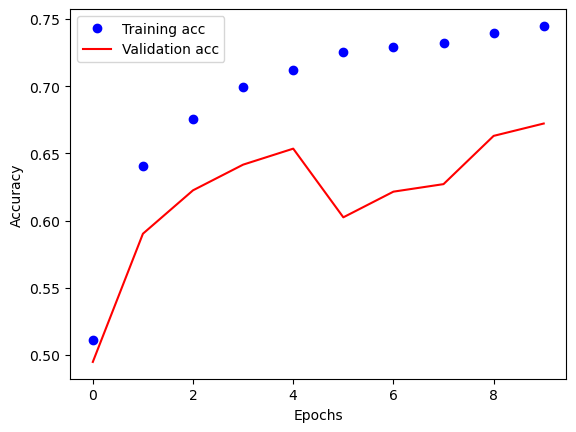

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 3. Train (again) and evaluate the model

- To this end, you have found the "best" hyper-parameters. 
- Now, fix the hyper-parameters and train the network on the entire training set (all the 50K training samples)
- Evaluate your model on the test set.

### 3.1. Train the model on the entire training set

Why? Previously, you used 40K samples for training; you wasted 10K samples for the sake of hyper-parameter tuning. Now you already know the hyper-parameters, so why not using all the 50K samples for training?

In [112]:
# <Compile your model again (using the same hyper-parameters)>
# ...

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=learning_rate),
              metrics=['acc'])

In [113]:
# <Train your model on the entire training set (50K samples)>
# <Use (x_train, y_train_vec) instead of (x_tr, y_tr)>
# <Do NOT use the validation_data option (because now you do not have validation data)>
# ...

history = model.fit(x_train, y_train_vec, batch_size=64, epochs=10)

Epoch 1/10
782/782 [==============================] - 44s 56ms/step - loss: 0.4712 - acc: 0.8567
Epoch 2/10
782/782 [==============================] - 46s 59ms/step - loss: 0.3798 - acc: 0.8782
Epoch 3/10
782/782 [==============================] - 45s 57ms/step - loss: 0.3265 - acc: 0.8959
Epoch 4/10
782/782 [==============================] - 45s 58ms/step - loss: 0.2849 - acc: 0.9084
Epoch 5/10
782/782 [==============================] - 46s 58ms/step - loss: 0.2524 - acc: 0.9193
Epoch 6/10
782/782 [==============================] - 45s 58ms/step - loss: 0.2244 - acc: 0.9288
Epoch 7/10
782/782 [==============================] - 46s 59ms/step - loss: 0.2042 - acc: 0.9357
Epoch 8/10
782/782 [==============================] - 46s 59ms/step - loss: 0.1974 - acc: 0.9387
Epoch 9/10
782/782 [==============================] - 46s 58ms/step - loss: 0.1760 - acc: 0.9451
Epoch 10/10
782/782 [==============================] - 46s 59ms/step - loss: 0.1673 - acc: 0.9493


### 3.2. Evaluate the model on the test set

Do NOT used the test set until now. Make sure that your model parameters and hyper-parameters are independent of the test set.

In [114]:
loss_and_acc = model.evaluate(x_test, y_test_vec)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

313/313 [==============================] - 4s 12ms/step - loss: 1.4582 - acc: 0.7497
loss = 1.4582217931747437
accuracy = 0.7497000098228455


# Final Notes
After several different iterations exploring different optimizations, my final model was able to achieve a high training accuracy and sub-par validation and testing accuracy. The final accuracy scores are:
- **Training**: 0.9493
- **Validation**: 0.7429
- **Testing**: 0.7497

These scores are indicative that the model is overfitting on the training data and not generalizing enough on the unseen data. This trend persisted through nearly all of my optimization loops. I used the following optimizations to attempt to combat the overfitting problem specifically:
- Dropout in various stages of the model stack
- Varying dropout rates between .1 and .5
- L2 Normalization on Convolutional Layers

Other optimization methods I tried in an attempt to raise the general accuracy include:
- Additional Convolutional loops in the model stack
- Varying convolutional filter sizes
- Non-square convolutional filter sizes
- Adding Batch Normalization
- Adding dropout
- Adjusting the learning rate
- Adjusting the batch size

My final model utilized all of the methods mentioned above (excluding the L2 regularization because I observed no improvements):
- **Learning Rate**: 0.001
- **Batch Size**: 64

**Note**: I saved all graphs from the training loops and these can be provided upon request for validation that changes were made.